In [2]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
grcdf = pd.read_csv('../K1_mi10_GRC.csv')
grcdf.head()

,Erm/Sci,Scm/Po,conf,strain
0,39.76,0.1,100,0.0
1,39.76,0.1,90,0.0
2,39.76,0.1,80,0.0
3,39.76,0.1,70,0.0
4,39.76,0.1,60,0.0


In [25]:
x = grcdf[['Erm/Sci','Scm/Po','conf']].values
y = grcdf[['strain']].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (70, 3) (70, 1)
Test set: (18, 3) (18, 1)


In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [27]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)



/Users/vippul/Desktop/Desk/BITS/TS-Geotech/Learning/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')


MSE: 6.932944715736926
RMSE: 2.6330485593199615
R-squared: 0.47726080667508075


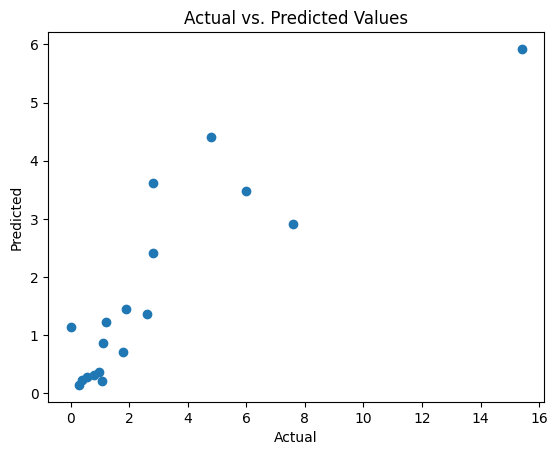

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()
